# **Teleco Customer Churn Analysis**

---

## Introduction
This project explores factors influencing customer churn using exploratory data analysis (EDA). It focuses on key variables such as contract types, payment methods, and tenure to identify patterns and trends affecting customer retention. Visualizations like bar charts and line graphs help highlight insights, while actionable recommendations are provided to reduce churn. The analysis aims to support businesses in developing strategies to enhance customer loyalty and satisfaction.

## Key Features:
- Churn analysis by contract type, payment method, and tenure.
- Data-driven insights and retention strategies.
- Visualization of churn trends.

## Highlights
- Dataset: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).
- Tools used: Python (Libraries - Pandas, Numpy, Matplotlib, Seaborn) and Jupyter Notebook.

## **About Dataset**
### **Context**
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

### **Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### **The data set includes information about:**
- Customers who left within the last month – the column is called Churn.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech
support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Demographic info about customers – gender, age range, and if they have partners and dependents.

---

In [45]:
#Downlaod required libraries

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

#I have these libraries pre-installed so it will show "Requirement already satisfied" 

In [19]:
#Importing required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading and initial exploration

#Reading csv file data

df = pd.read_csv("/Users/sameersaifi/Documents/Teleco Customer Churn/Telco-Customer-Churn.csv")

#Getting top 5 rows to review Dataframe

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
#Dataset Summary and Structure Inspection:

df.info() #used to check column names, data types, and missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

df["TotalCharges"] = df["TotalCharges"].replace(" ",0) #Identified and handled missing values by replacing blank spaces with 0 

#Converting the "TotalCharges" column datatype from object to float to ensure correct numerical operations.

df["TotalCharges"] = df["TotalCharges"].astype('float')

#Verify changes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [93]:
#Checking for null values in the dataset

df.isnull().sum().sum()

0

In [300]:
#converted O and 1 values of senior citizen to yes/no to make it easier to understand

def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Verify changes

df["SeniorCitizen"].head(5)


0    no
1    no
2    no
3    no
4    no
Name: SeniorCitizen, dtype: object

In [159]:
#Checking for duplicate values

df.duplicated().sum()

0

In [193]:
#Performed Descriptive analysis to understand distributions.

df.describe().round(2)

,tenure,MonthlyCharges
count,7043.00,7043.00
mean,32.37,64.76
std,24.56,30.09
min,0.00,18.25
25%,9.00,35.50
50%,29.00,70.35
75%,55.00,89.85
max,72.00,118.75


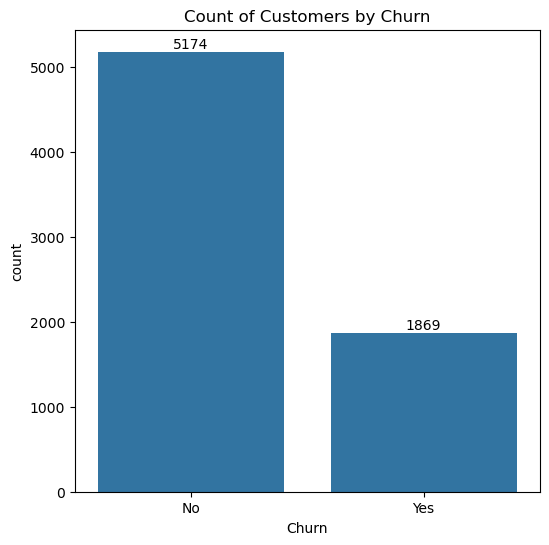

In [402]:
#Lets find out the customers who churned

plt.figure(figsize = (6,6))

ax = sns.countplot(x = df["Churn"],data = df)

ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Churn")

plt.show()


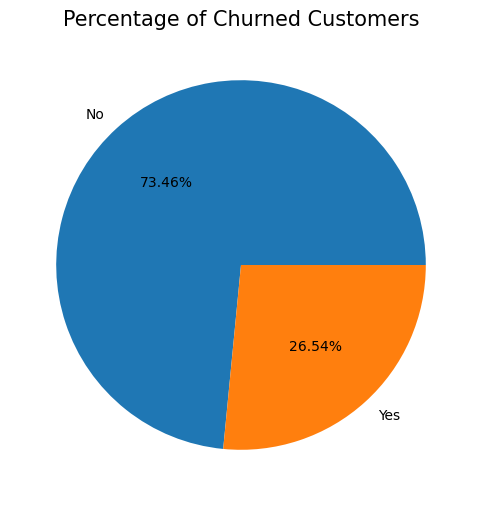

In [400]:
plt.figure(figsize = (6,6))

gb = df. groupby ("Churn") .agg({ 'Churn': "count"})

plt.pie(gb[ 'Churn'], labels = gb.index, autopct = "%1.2F%%")

plt.title("Percentage of Churned Customers",fontsize = 15)

plt.show()

### From the given pie chart we can conclude that 26.54% of our customers have churned out.
### Now let's explore the reason behind it.

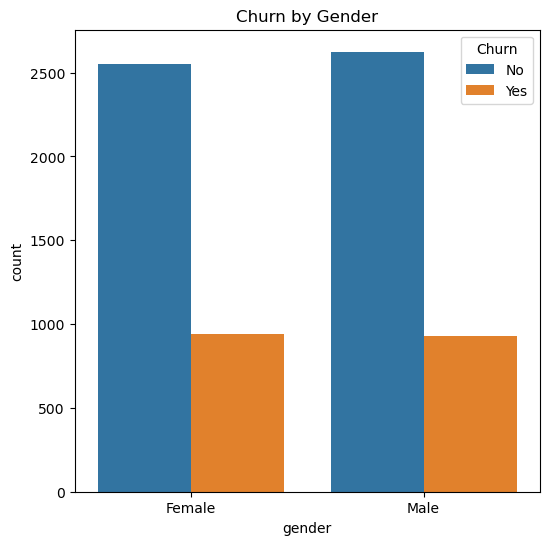

In [396]:
#Customer Churn by Gender

plt.figure(figsize = (6,6))

ax = sns.countplot(x = df["gender"],data = df , hue = 'Churn')

plt.title("Churn by Gender")

plt.show()

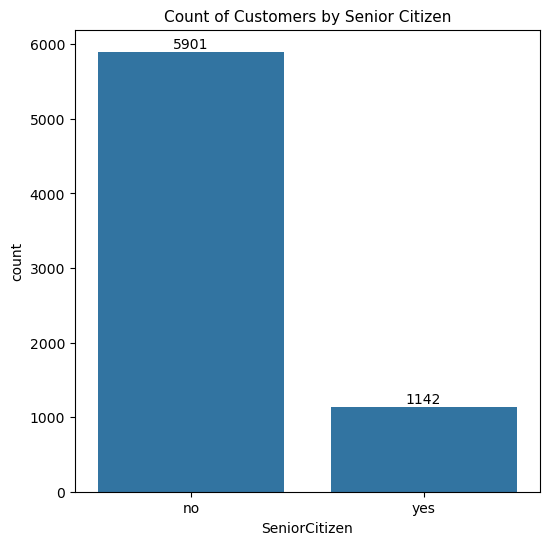

In [398]:
#Customer Churn by Senior Citzen

plt. figure(figsize = (6,6))

ax = sns.countplot(x = "SeniorCitizen", data = df)

ax.bar_label(ax.containers[0])

plt.title("Count of Customers by Senior Citizen", fontsize = 11) 

plt.show()

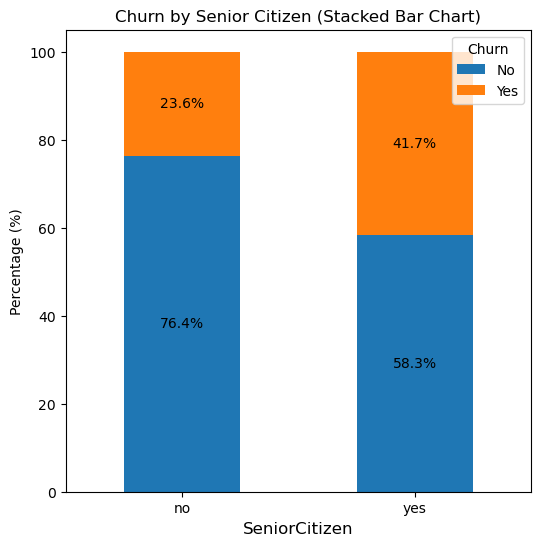

In [384]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

# Plot
fig, ax = plt.subplots(figsize=(6,6)) # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax)

# Add percentage labels on the bars
for p in ax.patches:
 width, height = p.get_width(), p.get_height()
 x, y = p.get_xy()
 ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha = 'center', va = 'center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)') 

plt.xlabel('SeniorCitizen',fontsize = 12)

plt.ylabel('Percentage (%)')

plt.xticks(rotation=0)

plt.legend(title='Churn', loc='upper right')

plt.show()

### comparative a greater pecentage of people in senior citizen category have churned

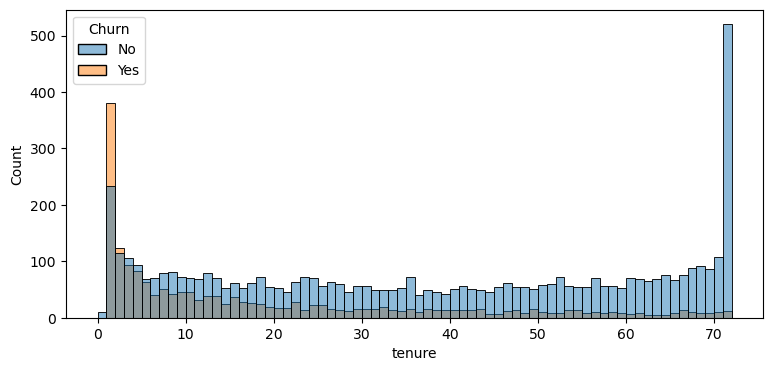

In [404]:
plt.figure(figsize = (9,4))

sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")

plt.show()

### people who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months have churned

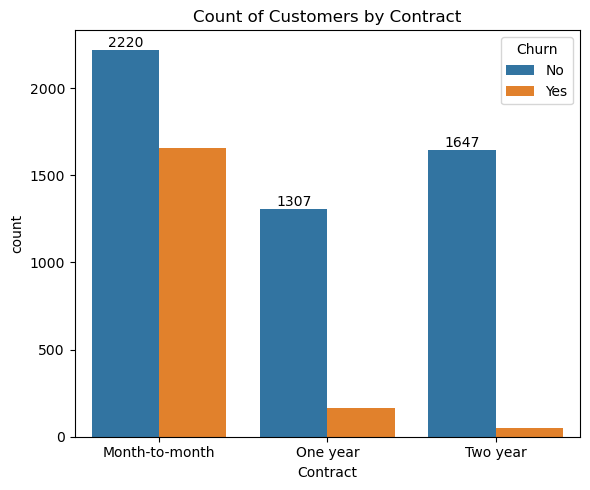

In [38]:
plt.figure(figsize = (6,5))

ax = sns.countplot(x = "Contract", data = df, hue = "Churn" )

ax.bar_label(ax.containers [0])

plt.title("Count of Customers by Contract")

plt.tight_layout()

plt.show()

### people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [406]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

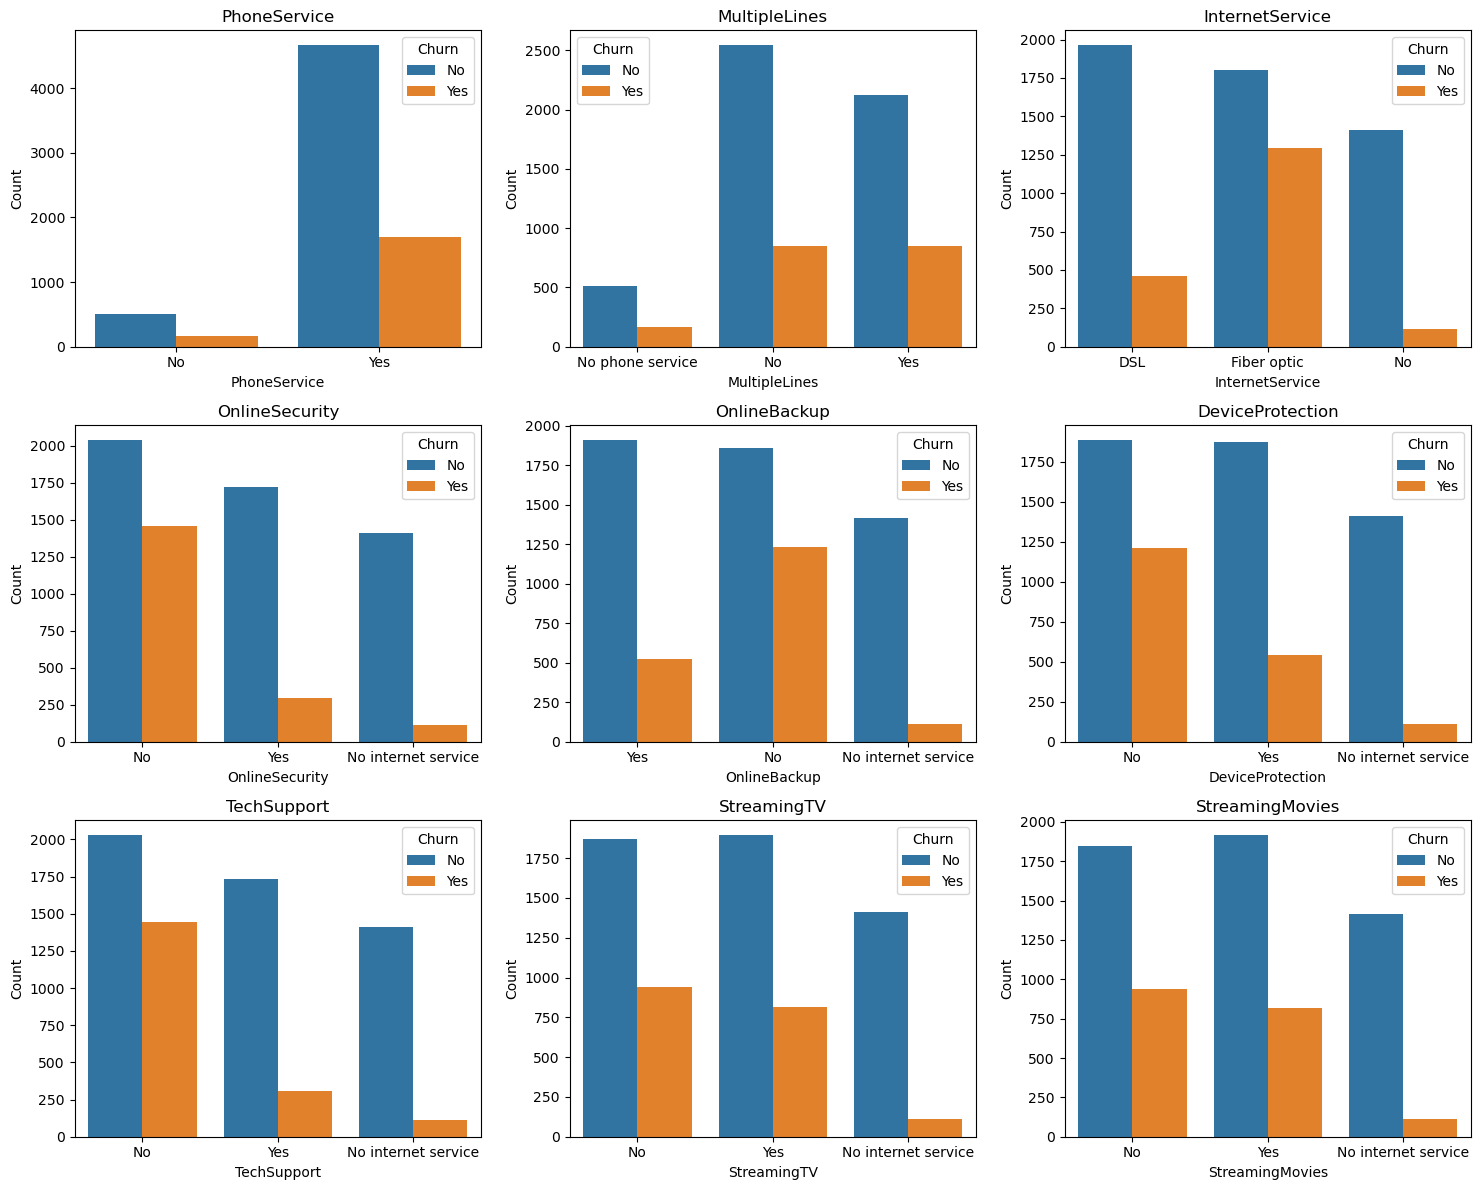

In [87]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 ### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

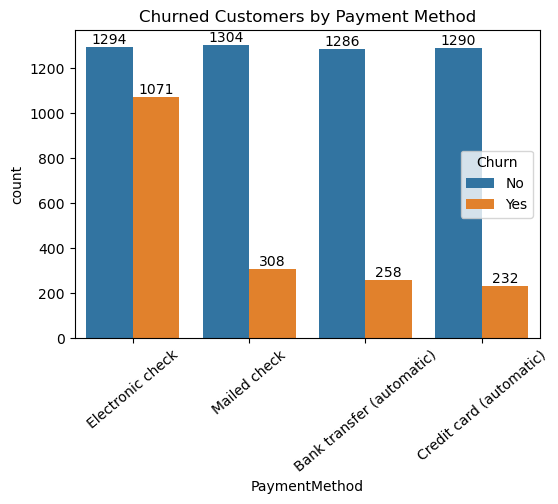

In [64]:
plt.figure(figsize = (6,4))

ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")

ax.bar_label(ax.containers[0])

ax.bar_label(ax.containers[1])

plt.title("Churned Customers by Payment Method")

plt.xticks(rotation = 40)

plt.show()

### customer is likely to churn when he is using electronic check as a payment method.

---------

# **Conclusion**

### **The EDA process provides valuable insights into customer churn. It shows that factors like contract type, monthly charges, and tenure have a big impact on whether customers stay or leave. Customers with long-term, fixed contracts tend to stick around, while those on monthly plans are more likely to leave. Pricing and service quality also play a key role in keeping customers happy. These findings can help businesses create better retention strategies, adjust pricing, and enhance customer service to reduce churn.**

---